Жданова Яна Дмитриевна
ИУ5-64


# ТМО РК№1

Вариант 5:
*   Номер задачи - 1
*   Номер набора данных, указанного в задаче - 5

Задача 1:

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Набор данных:
https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict.csv)

Дополнительные требования:
*   Для студентов группы ИУ5-64Б, ИУ5Ц-84Б - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".









# Импорт данных и необходимых библиотек
Импорт библиотек:

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Импорт данных:

In [63]:
data = pd.read_csv('Admission_Predict.csv', encoding = 'ISO-8859-1')

In [64]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# Обработка данных

##Обработка пропусков в данных

Типы данных в представленном датасете:

In [65]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Проверим, есть ли в датасете пропущенные значения:

In [66]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

В данном датасете нет строк или столбцов, содержащих пропущенные значения.

##Дополнительная обработка данных

In [67]:
data.columns.tolist()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

Столбец "Serial No." - столбец, включающий в себя индексы строк таблицы. Для дальнейшего анализа он нам не понадобится. Удалим его:

In [68]:
data = data.drop(columns = 'Serial No.')
data.columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [69]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Проверим, содержатся ли в данных дубликаты:

In [70]:
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [71]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Дубликатов в данных нет.

# Корреляционный анализ данных

Целевым признаком в данном датасете является "Chance of Admit" (вероятность поступления).

Благодаря корреляции признаков мы сможем выяснить следующую информацию:


*   Поймем, какие признаки наиболее коррелируют с целевым.
*   Выясним, какие нецелевые признаки зависимы друг от друга.


Построим матрицу корреляции:

In [72]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Для наглядности корреляционной матрицы будем использовать "тепловую карту":

Text(0.5, 1.0, 'Корреляционная матрица')

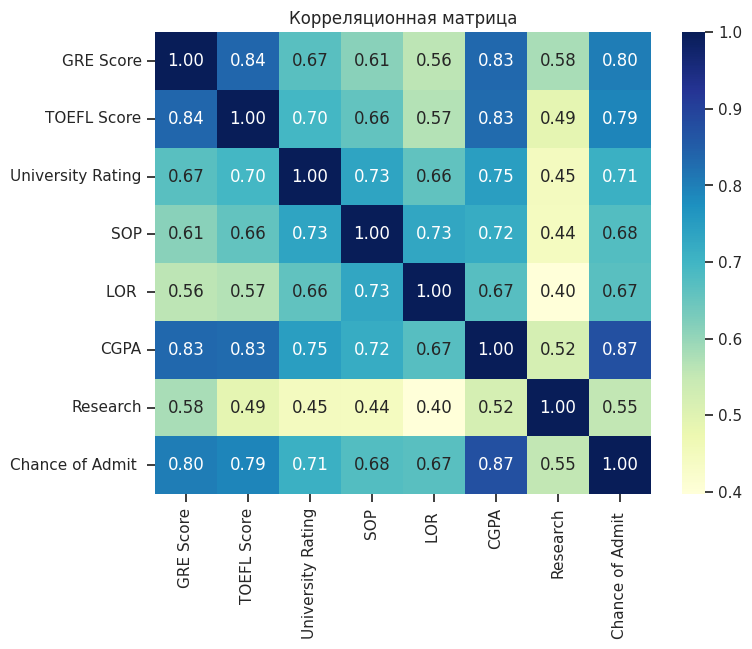

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Корреляционная матрица')

**На основе корреляционной матрицы можно сделать следующие выводы:**


*   Все признаки в достаточной мере коррелируют с целевым признаком, соответственно, никакой из признаков не стоит исключать на основании слабой корреляции с целевым.
*   В данных нет признаков с крайне высоким коэффициентом корреляции, из чего следует, что нет линейно зависимых признаков, которые необходимо было бы исключить из модели.

Также можно проследить следующие зависимости:

* Видно, что "GRE Scores" и "TOEFL Scores" весьма сильно коррелируют между собой и с признаком "Undergraduate GPA", что является показателем того, что при высоком среднем балле бакалавриата, баллы, полученные за экзамены GRE и TOEFL тоже будут высокими, причем баллы за оба экзамена будут высокими.
* Также стоит отметить, что при высоких показателях, перечисленных в предыдущем пункте, вероятность потупления ("Chance of Admit") тоже высока.
* При высоком рейтинге университета ("University Rating") показатели среднего балла бакалавриата ("Undergraduate GPA") рекомендации, такие как "Statement of Purpose" (мотивационное письмо) и "Letter of Recommendation Strength"(рекомендательное письмо) тоже имеют высокую вероятность быть выше, поскольку признаки достаточно сильно коррелируют между собой.

**Построение модели машинного обучения возможно.**

Поскольку в данном случае мы решаем задачу регрессии, то свой выбор я бы сделала в пользу построения модели линейной регрессии.









# График "Скрипичная диаграмма (violin plot)"

Скрипичная диаграмма для показателя рейтинга университета "University Rating":

<Axes: title={'center': 'Рейтинг университета ("University Rating")'}, ylabel='University Rating'>

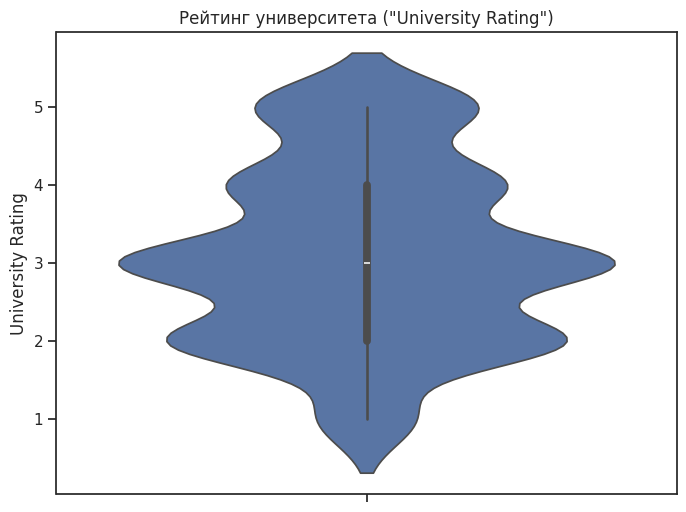

In [86]:
plt.figure(figsize=(8, 6))
plt.title('Рейтинг университета ("University Rating")')
sns.violinplot(y=data['University Rating'])